In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import warnings
import matplotlib.pyplot as plt
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [5]:
def Image_Dir_Func2(data_dir):
        data_image_dir = []
        image_size = 256
        categories = ['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight']
        try:
            for i in os.listdir(data_dir):
                train_test_val_dirs = os.path.join(data_dir,i)
                for j in os.listdir(train_test_val_dirs):
                    cat_index = categories.index(j)
                    image_path = os.path.join(train_test_val_dirs,j)
                    for k in os.listdir(image_path):
                        image_path_name = os.path.join(image_path, k)
                        data_image = cv2.imread(image_path_name)
                        data_image = cv2.resize(data_image, (image_size, image_size))
                        data_image_dir.append([data_image,cat_index])
            return data_image_dir
        except Exception as e:
            print('Error Generated image directory')
            raise e
    

In [6]:
data_dir = r'D:\my_projects\Potato-Disease-Prediction-CNN\data\Potato'
Data = Image_Dir_Func2(data_dir)

In [7]:
len(Data)

1500

In [8]:
random.shuffle(Data)

In [9]:
X = []
y = []

IMG_SIZE = 256

for features, label in Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

X = X / 255.0

y = np.array(y)

In [10]:
pickle_out = open("..\data_main\X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("..\data_main\y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [2]:
n_classes = 3
model = models.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomContrast(0.2),
        layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
        layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=X.shape[1:]
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes),
    ]
)

NameError: name 'models' is not defined

In [1]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

NameError: name 'model' is not defined

In [ ]:
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=10,
    validation_split=0.3,
)

In [9]:
import pickle

pickle_out = open("..\data_main\X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("..\data_main\y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

KeyboardInterrupt: 

In [9]:
pickle_in = open("..\data_main\X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("..\data_main\X.pickle","rb")
y = pickle.load(pickle_in)

In [3]:
#Load the Model
model_path = '..\Model\potato-model'
new_model = tf.keras.models.load_model(model_path)

In [13]:
pred_y = new_model.predict(X)

47/47 [==============================] - 16s 331ms/step


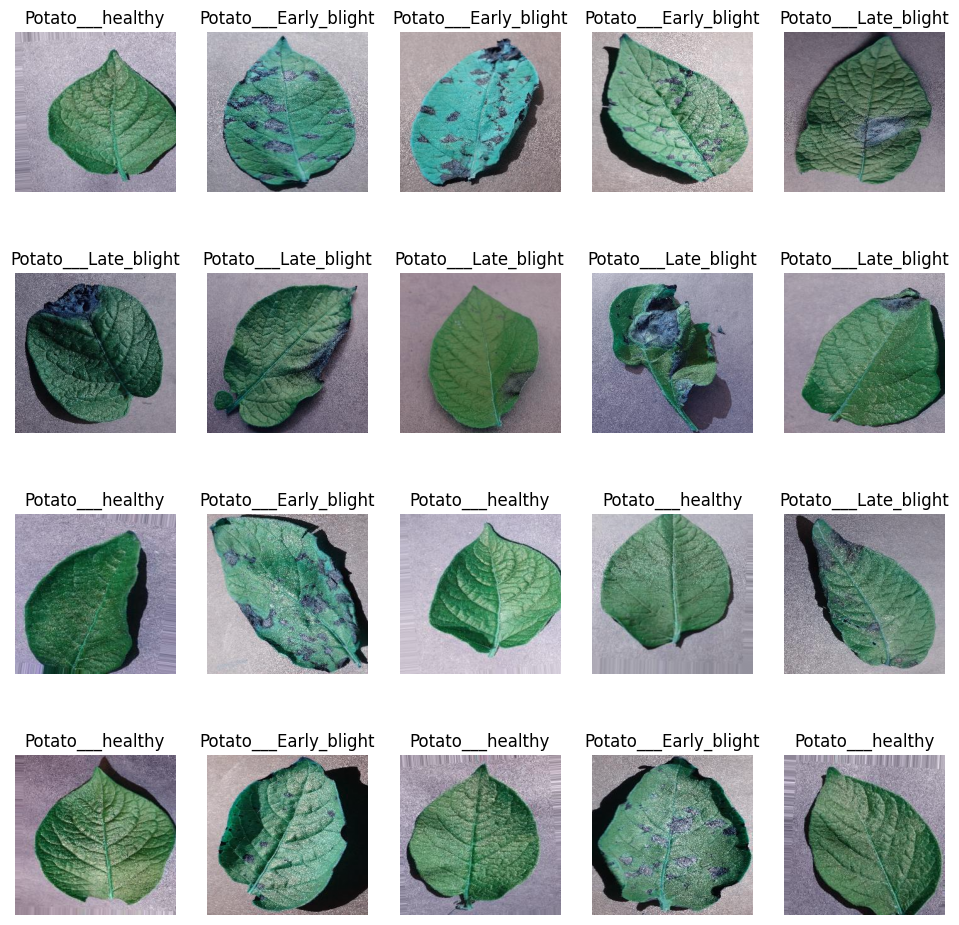

In [36]:
plt.figure(figsize=(12, 12))
categories = ['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight']
for i in range(20):
    plt.subplot(4,5,i+1)
    categories_index = categories[np.argmax(pred_y[i])]
    plt.imshow(X[i])
    plt.title(f"{categories_index}")
    plt.axis('off')

In [38]:
new_model.evaluate(X, y)

47/47 [==============================] - 16s 325ms/step - loss: 0.1390 - accuracy: 0.9473


[0.13900883495807648, 0.9473333358764648]

In [117]:
random_image = random.choice(X)

1/1 [==============================] - 0s 44ms/step


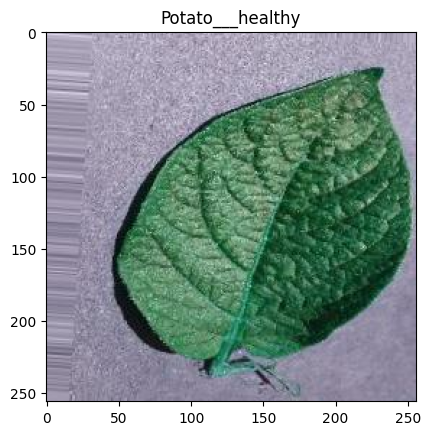

In [118]:
pred11 = new_model.predict(np.expand_dims(random_image, axis=0))
plt.title(categories[np.argmax(pred11)])
plt.imshow(random_image)
plt.show()

1/1 [==============================] - 0s 42ms/step


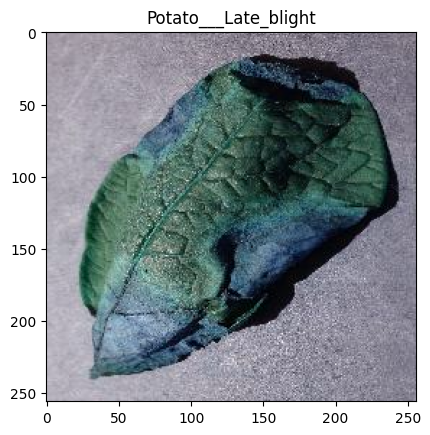

In [124]:
"""Single Image Prediction form Raw data
"""

#Single Image Path
single_image = r"D:\my_projects\Potato-Disease-Prediction-CNN\data\Potato\Valid\Potato___Late_blight\93905331-a3b3-43dd-8596-d8f7e6b3e88f___RS_LB 3306.JPG"
cv_image = cv2.imread(single_image)
cv_image = cv2.resize(cv_image,(256, 256))
cv_array = np.array(cv_image).reshape(-1, 256, 256, 3)
cv_array = cv_array / 255.0
pred12 = new_model.predict(cv_array)
plt.imshow(cv_image)
plt.title(categories[np.argmax(pred12)])
plt.show()